# Playing with Food Demand Forecasting

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('seaborn')

In [2]:
center = pd.read_csv('data/fulfilment_center_info.csv')
meal = pd.read_csv('data/meal_info.csv')
food = pd.read_csv('data/food.csv')

In [3]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
df = food.merge(center, on='center_id')
df = df.merge(meal, on='meal_id')

In [7]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [8]:
table = pd.pivot_table(data=df, index='category', values='num_orders', aggfunc=np.sum)

In [9]:
table.head()

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959


Text(0.5, 1.0, 'Most popular food')

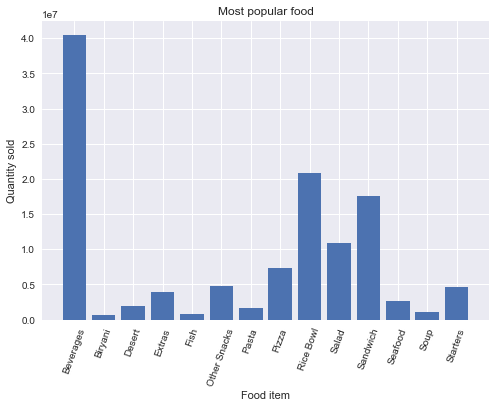

In [10]:
plt.bar(table.index,table['num_orders'])
plt.xticks(rotation=70) 
plt.xlabel('Food item') 
plt.ylabel('Quantity sold') 
plt.title('Most popular food')

#save plot 
#plt.savefig('matplotlib_plotting_6.png',dpi=300,bbox_inches='tight')

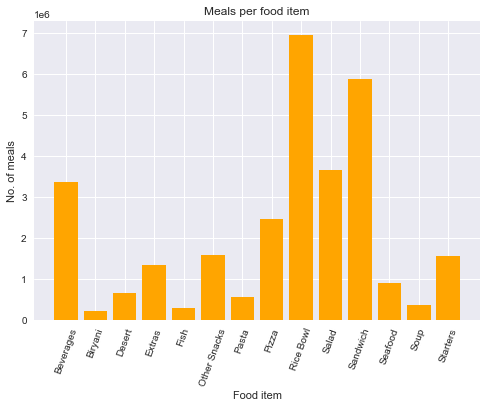

In [11]:
#dictionary for meals per food item
item_count = {}

for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i] / meal[meal['category'] == table.index[i]].shape[0]


plt.bar([x for x in item_count], [v for x, v in item_count.items()], color='orange')
plt.xticks(rotation=70)
plt.xlabel('Food item')
plt.ylabel('No. of meals')
plt.title('Meals per food item')

#save plot
# plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_7.png',dpi=300,bbox_inches='tight')

#display plot
plt.show()

In [12]:
item_count

{'Beverages': 3373377.0833333335,
 'Biryani': 210616.0,
 'Desert': 646918.0,
 'Extras': 1328326.3333333333,
 'Fish': 290653.0,
 'Other Snacks': 1588764.3333333333,
 'Pasta': 545914.6666666666,
 'Pizza': 2461240.0,
 'Rice Bowl': 6958021.0,
 'Salad': 3648112.0,
 'Sandwich': 5878927.333333333,
 'Seafood': 905238.0,
 'Soup': 346548.6666666667,
 'Starters': 1549707.3333333333}

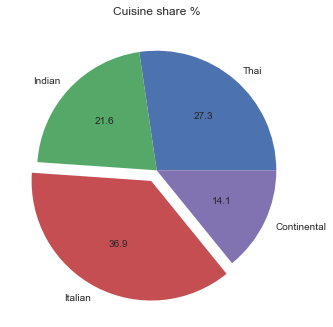

In [13]:
#dictionary for cuisine and its total orders
d_cuisine = {}
#total number of order
total = df['num_orders'].sum()
#find ratio of orders per cuisine
cuisines = df['cuisine'].unique()
for c in cuisines:
    c_order = df[df['cuisine'] == c]['num_orders'].sum()
    d_cuisine[c] = c_order / total
    
plt.pie([x*100 for x in d_cuisine.values()], labels=[x for x in d_cuisine.keys()], autopct='%0.1f', explode=[0,0,0.1,0])
plt.title('Cuisine share %') 
# plt.savefig('matplotlib_plotting_8.png', dpi=300, bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'Analysing cuisine price')

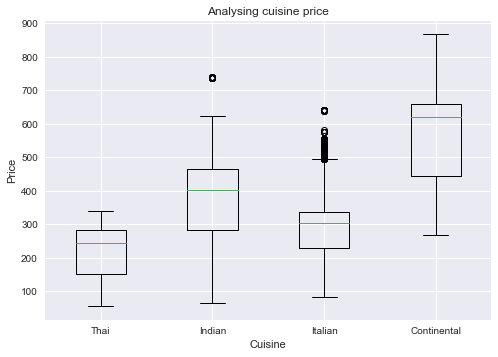

In [14]:
c_price = {}

for i in cuisines:
    c_price[i] = df[df['cuisine'] == i].base_price

plt.boxplot([x for x in c_price.values()], labels=[x for x in c_price.keys()])
plt.xlabel('Cuisine') 
plt.ylabel('Price') 
plt.title('Analysing cuisine price') 

# plt.savefig('matplotlib_plotting_9.png', dpi=300, bbox_inches='tight') 
# plt.show()

Text(0.5, 1.0, 'Inspecting price effect')

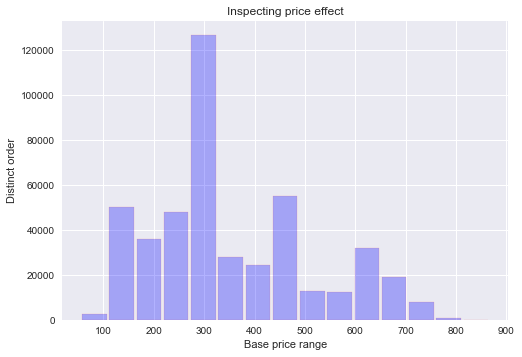

In [15]:
plt.hist(df['base_price'], rwidth=0.9, alpha=0.3, color='blue', bins=15, edgecolor='red') 

plt.xlabel('Base price range') 
plt.ylabel('Distinct order') 
plt.title('Inspecting price effect')

In [16]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [17]:
df['revenue'] = df['checkout_price'] * df['num_orders']  # df.apply(lambda x: x.checkout_price * x.num_orders, axis=1)
df['month'] = df['week'].apply(lambda x: x // 4)

#list to store month-wise revenue
month = [] 
month_order = []

for i in range(max(df['month'])):
    month.append(i) 
    month_order.append(df[df['month']==i].revenue.sum()) 

#list to store week-wise revenue
week = []
week_order = [] 

for i in range(max(df['week'])): 
    week.append(i) 
    week_order.append(df[df['week']==i].revenue.sum())

Text(0.5, 1.0, 'Monthly income')

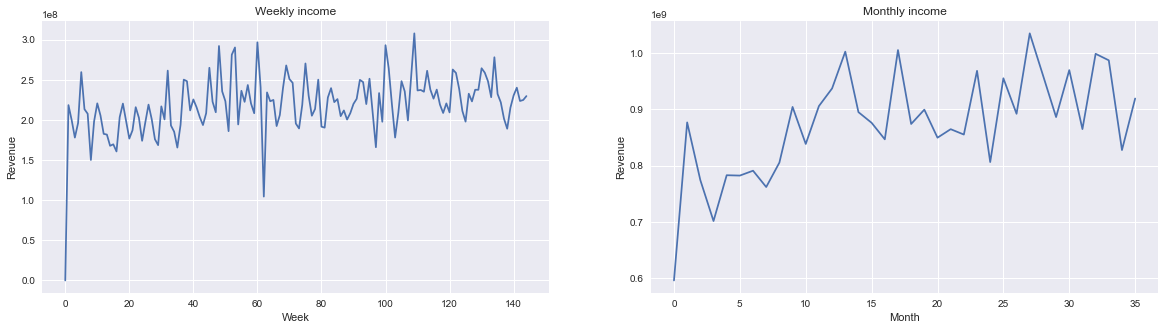

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax[0].plot(week, week_order)
ax[0].set_xlabel('Week')
ax[0].set_ylabel('Revenue')
ax[0].set_title('Weekly income')

ax[1].plot(month, month_order)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Revenue')
ax[1].set_title('Monthly income')

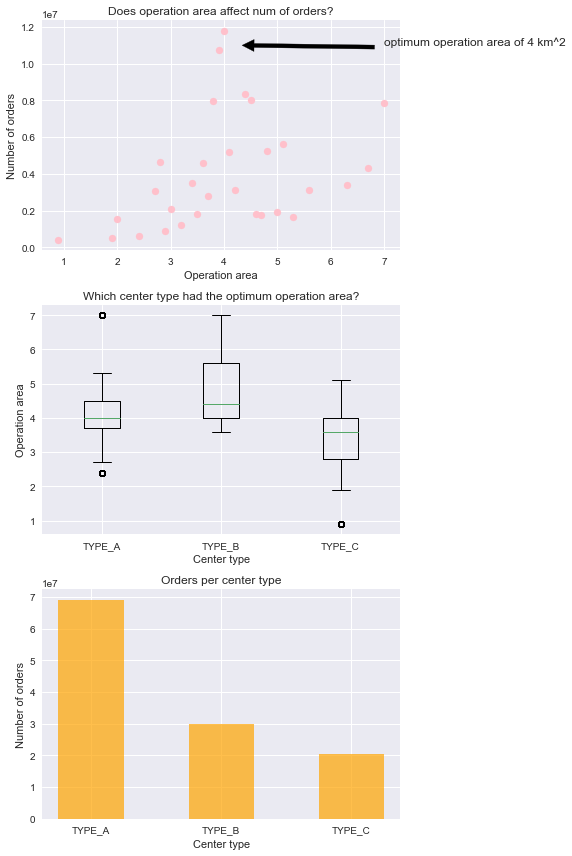

In [19]:
center_type_name = ['TYPE_A','TYPE_B','TYPE_C']

#relation between op area and number of orders
op_table = pd.pivot_table(df, index='op_area', values='num_orders', aggfunc=np.sum)

#relation between center type and op area
c_type = {}
for i in center_type_name:
    c_type[i] = df[df['center_type']==i].op_area

#relation between center type and num of orders
center_table=pd.pivot_table(df, index='center_type', values='num_orders',aggfunc=np.sum)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

ax[0].scatter(op_table.index, op_table['num_orders'], color='pink')
ax[0].set_xlabel('Operation area')
ax[0].set_ylabel('Number of orders')
ax[0].set_title('Does operation area affect num of orders?')
ax[0].annotate(
    'optimum operation area of 4 km^2',
    xy=(4.2,1.1*10**7),
    xytext=(7,1.1*10**7),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=12
)

ax[1].boxplot([x for x in c_type.values()], labels=[x for x in c_type.keys()])
ax[1].set_xlabel('Center type')
ax[1].set_ylabel('Operation area')
ax[1].set_title('Which center type had the optimum operation area?')

ax[2].bar(center_table.index, center_table['num_orders'], alpha=0.7, color='orange', width=0.5)
ax[2].set_xlabel('Center type')
ax[2].set_ylabel('Number of orders')
ax[2].set_title('Orders per center type')

plt.tight_layout()

# Charting Notes

- Scatter plots are useful for showing the relationship between two variables. Any correlation between variables or outliers in the data can be easily spotted using scatter plots.
- Matplotlib subplots makes it easy to view and compare different plots in the same figure.
- A line plot is useful for visualizing the trend in a numerical value over a continuous time interval.
- It is easy to confuse histograms with bar plots. But remember, histograms are used with continuous data whereas bar plots are used with categorical data.
- A histogram shows the distribution of numeric data through a continuous interval by segmenting data into different bins. Useful for inspecting skewness in the data.
- Box plot does not show the distribution of data points within each group.
- Box plot gives statistical information about the distribution of numeric data divided into different groups. It is useful for detecting outliers within each group.
- A pie chart is rendered useless when there are a lot of items within a category. This will decrease the size of each slice and there will be no distinction between the items.
- A pie chart is suitable to show the proportional distribution of items within the same category.
- Bar graphs should not be used for continuous values.
- Bar graphs are best used when we need to compare the quantity of categorical values within the same category.

# Sklearn for Prediction and Forecasting

In [20]:
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [21]:
lb1 = LabelEncoder()
df['center_type'] = lb1.fit_transform(df['center_type'])

lb2 = LabelEncoder()
df['category'] = lb2.fit_transform(df['category'])

lb3 = LabelEncoder()
df['cuisine'] = lb3.fit_transform(df['cuisine'])

Text(0.5, 1.0, 'num_orders Distribution')

<Figure size 864x504 with 0 Axes>

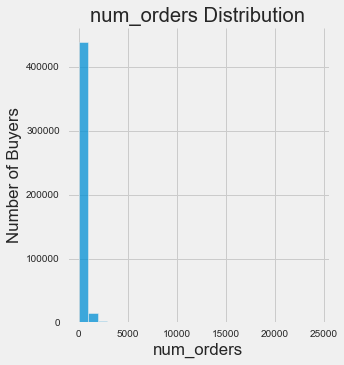

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.displot(df.num_orders, bins=25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [23]:
df2 = df.drop(['id'], axis=1)
correlation = df2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'revenue', 'homepage_featured', 'emailer_for_promotion',
       'op_area', 'cuisine', 'city_code', 'region_code'],
      dtype='object')

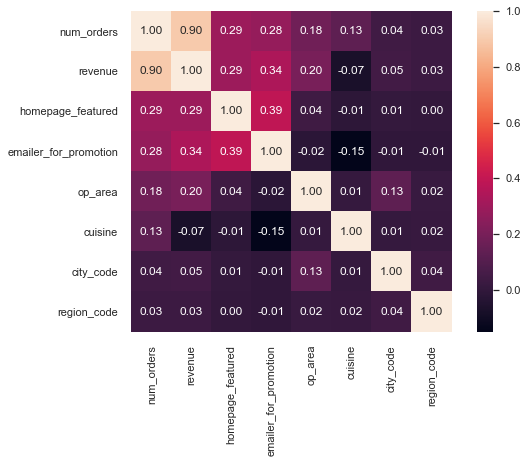

In [24]:
correlation_map = np.corrcoef(df2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

In [25]:
features = columns.drop(['num_orders'])
df3 = df[features]
X = df3.values
y = df['num_orders'].values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

### xgboost

In [27]:
from xgboost import XGBRegressor

XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred < 0] = 0

print('RMSLE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 32.84209947968467


### Linear Regression

In [28]:
LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_val)
y_pred[y_pred < 0] = 0

print('RMSLE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 153.67479548423614


### Lasso

In [29]:
L = Lasso()
L.fit(X_train, y_train)

y_pred = L.predict(X_val)
y_pred[y_pred < 0] = 0

print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 152.63766543968413


### Elastic Net

In [30]:
EN = ElasticNet()
EN.fit(X_train, y_train)

y_pred = EN.predict(X_val)
y_pred[y_pred < 0] = 0

print('RMSLE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 128.31193387085773


### Decision Tree

In [31]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

y_pred = DT.predict(X_val)
y_pred[y_pred < 0] = 0

print('RMSLE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 29.242390931239875


In [32]:
DT.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### KNN

In [33]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_val)
y_pred[y_pred < 0] = 0

print('RMSLE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 43.934053646065976


### Gradient Boost

In [34]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)

y_pred = GB.predict(X_val)
y_pred[y_pred < 0] = 0

print('RMSLE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 39.005794711911435


### SVM

```python
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', C=100, gamma='auto')

# Try to prevent taking too long
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
# X_test = scaling.transform(X_test)
# from sklearn import preprocessing
# X_train = preprocessing.scale(X_train)
# X_test = preprocessing.scale(X_test)

svr_lin.fit(X_train, y_train)

y_pred = svr_lin.predict(X_val)
y_pred[y_pred < 0] = 0

print('RMSLE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))
```

### Best model

In [35]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

sns.set_style('whitegrid')
sns.set_context('talk')
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (30, 10),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}

plt.rcParams.update(params)

In [37]:
param_grid = { "min_samples_split": [2, 4, 8, 16], "min_samples_leaf": [1, 2, 3, 4], "max_leaf_nodes": [None, 10, 20, 100] }

grid_cv_dtm = GridSearchCV(DT, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': [None, 10, 20, 100],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 8, 16]})

In [38]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.9175870953279635
Best Hyperparameters::
{'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 16}


In [39]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.889755,0.013330,0.020304,0.000678,None,1,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.889575,0.880579,0.888848,0.889833,0.880019,0.885771,0.004483,32
1,0.850348,0.006817,0.017603,0.000200,None,1,4,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.895944,0.887314,0.897076,0.901315,0.885892,0.893508,0.005933,31
2,0.811742,0.009590,0.015703,0.000510,None,1,8,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.904858,0.897008,0.908732,0.911006,0.900485,0.904418,0.005149,28
3,0.772934,0.003907,0.014103,0.000200,None,1,16,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.916759,0.906700,0.920140,0.919468,0.910081,0.914630,0.005327,11
4,0.821543,0.006926,0.016903,0.000374,None,2,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 2...",0.901011,0.896697,0.904837,0.907826,0.898326,0.901740,0.004105,30


In [42]:
# fig, ax = plt.subplots()
# sns.pointplot(
#     data=df[['mean_test_score', 'param_max_leaf_nodes']],  # , 'param_max_depth'
#     y='mean_test_score',
#     x='param_max_depth',
#     hue='param_max_leaf_nodes',
#     ax=ax
# )
# ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

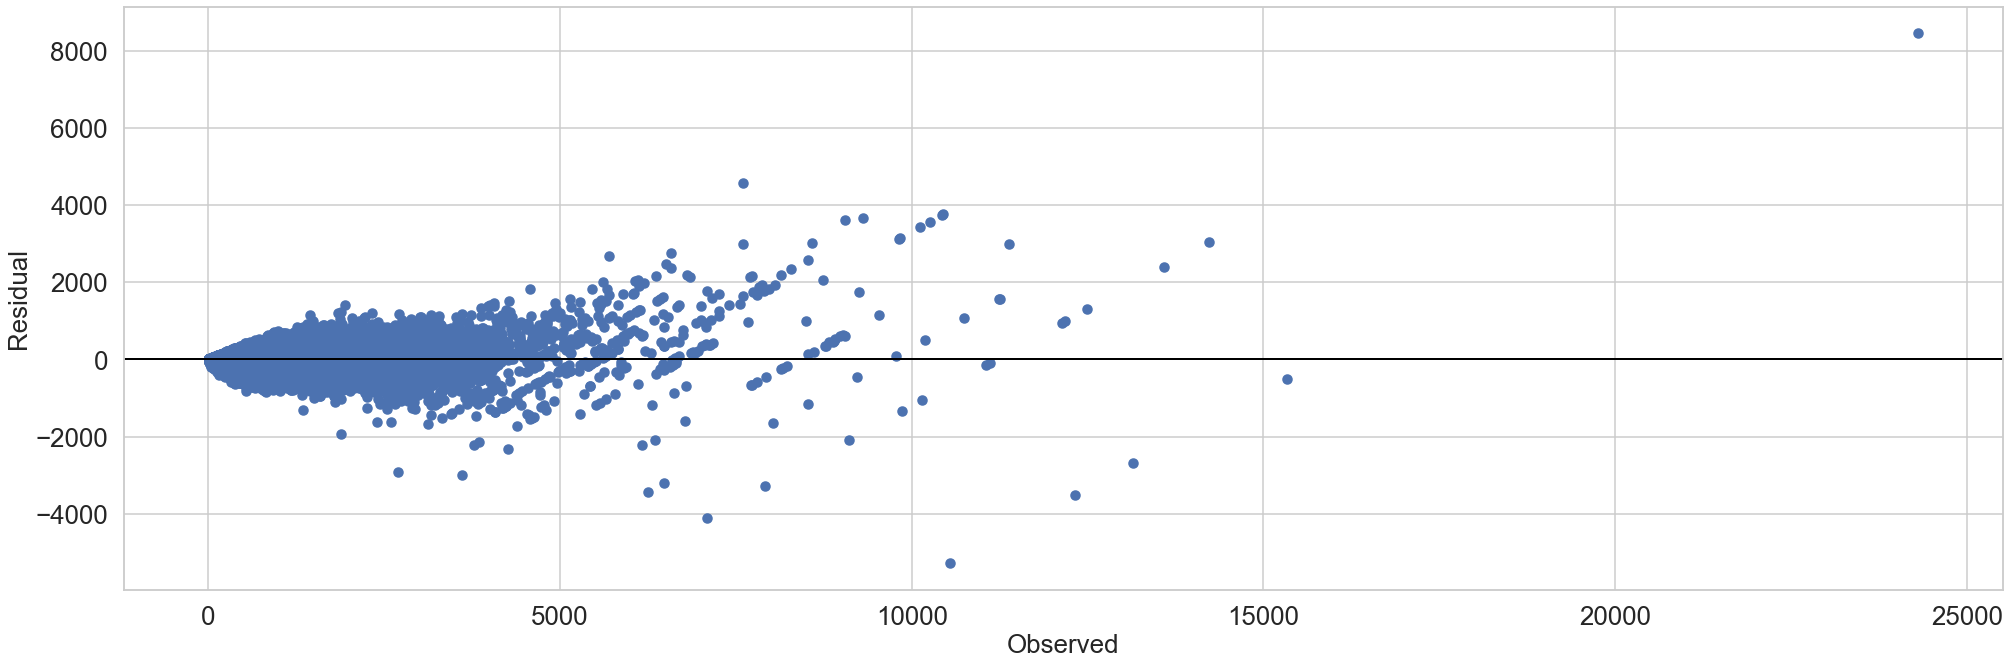

In [43]:
predicted = grid_cv_dtm.best_estimator_.predict(X)
residuals = y.flatten() - predicted

fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [44]:
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10, scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.624
MSE::-28005.237


In [45]:
grid_cv_dtm.best_estimator_.fit(X_train, y_train)
y_pred = grid_cv_dtm.best_estimator_.predict(X_val)

y_pred[y_pred < 0] = 0

print('RMSLE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 26.378264491072773


### Notes

```python
testfinal = pd.merge(df, meal, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols = testfinal.columns.tolist()
print(tcols)

tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])
lb2 = LabelEncoder()
testfinal['category'] = lb1.fit_transform(testfinal['category'])
lb3 = LabelEncoder()
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

X_test = testfinal[features].values

pred = DT.predict(X_test)
pred[pred < 0] = 0

final = pd.DataFrame({
    'id' : testfinal['id'],
    'num_orders' : pred
})

# submit.to_csv("submission.csv", index=False)
# submit.describe()
```